In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

%matplotlib inline


In [271]:
## The input - translate input into instructions
datain = np.loadtxt('17a_input.txt',comments=None,dtype=str,delimiter=(', '))#,usecols=(0,1)) #
# test data
#datain = np.loadtxt('17a_input_test.txt',comments=None,dtype=str,delimiter=(', '))#,usecols=(0,1)) #

axis = np.empty((datain.shape[0])).astype(int)
c1 = np.empty_like(axis)
c2a = np.empty_like(axis)
c2b = np.empty_like(axis)

for i in range(datain.shape[0]):
    for j in [0,1]:
        datain[i,j] = datain[i,j].replace("b'",'').replace("'",'')
    
    if datain[i,0][0] == 'x':
        axis[i] = 0
    else:
        axis[i] = 1
    
    c1[i] = datain[i,0][2:]
    c2a[i] = datain[i,1].split('..')[0][2:]
    c2b[i] = datain[i,1].split('..')[1]
    
datain = np.array([axis,c1,c2a,c2b]).T
    
#print(max(c1),max(c2a),max(c2b)) # max coordinates are 1785

In [292]:
# what's the maximum depth of a shelf?
maxshelf = 0
minshelf = 100
for row in datain:
    if row[0] == 1:
        maybemaxmin = row[1]
        if maybemaxmin > maxshelf:
            maxshelf = maybemaxmin
            
    if row[0] == 0:
        maybemaxmin = min(row[2],row[3])
        if maybemaxmin < minshelf:
            minshelf = maybemaxmin

print("min depth of shale:",minshelf)
print("max depth of shale:",maxshelf)

# what's the min/max x coordinate?
maxx = 500
minx = 500
for row in datain:
    if row[0] == 0:
        maybemaxmin = row[1]
        if maybemaxmin > maxx:
            maxx = maybemaxmin
        elif maybemaxmin < minx:
            minx = maybemaxmin
        
print("max x coord:",maxx)
print("min x coord:",minx)

min depth of shale: 4
max depth of shale: 1785
max x coord: 675
min x coord: 393


In [273]:
# transform the input data into an input section 

arrayin = np.zeros((maxx+2,maxshelf+1)).astype(int)

for i in range(datain.shape[0]):
    
    if datain[i,0] == 0:
        for j in range(datain[i,2],datain[i,3]+1):
            arrayin[datain[i,1],j] = 1 # clay is 1
        
    else:
        for j in range(datain[i,2],datain[i,3]+1):
            arrayin[j,datain[i,1]] = 1 # clay is 1
            
# seed the spring with falling water
arrayin[500,0] = 3 #falling water is 3

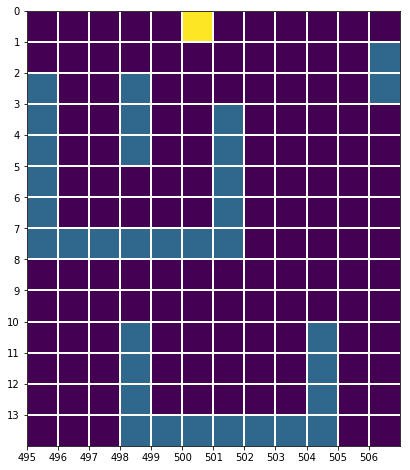

In [263]:
im = plt.figure(figsize=(8,8))
ax = plt.gca()
plt.imshow(arrayin[495:507,:14].T,extent=[495,507,14,0])
ax.set_xticks(np.arange(495, 507, 1))
ax.set_yticks(np.arange(0, 14, 1))
ax.set_xticklabels(np.arange(495, 507, 1))
ax.set_yticklabels(np.arange(0, 14, 1))
ax.grid(color='w', linestyle='-', linewidth=2)


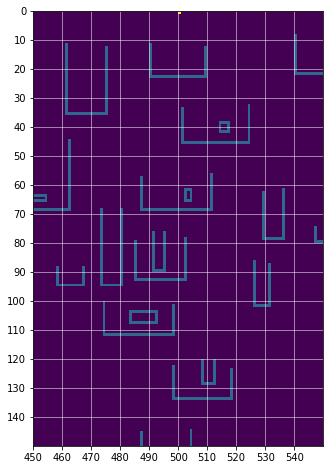

In [274]:
figminx = 450
figmaxx = 550
figminy = 0
figmaxy = 150

im = plt.figure(figsize=(8,8))
ax = plt.gca()
plt.imshow(arrayin[figminx:figmaxx,figminy:figmaxy].T,extent=[figminx,figmaxx,figmaxy,figminy])
ax.set_xticks(np.arange(figminx, figmaxx, 10))
ax.set_yticks(np.arange(figminy, figmaxy, 10))
ax.set_xticklabels(np.arange(figminx, figmaxx, 10))
ax.set_yticklabels(np.arange(figminy, figmaxy, 10))
ax.grid(color='w', linestyle='-', linewidth=0.5)

In [147]:
def test_still(arr,coord):        
        if arr[coord[0]+1,coord[1]] == 1 and arr[coord[0],coord[1]+1] in [1,2]:
            return True
        elif arr[coord[0]+1,coord[1]] == 0:
            return False
        elif test_still(arr,[coord[0]+1,coord[1]]):
            return True        
        else:
            return False
    

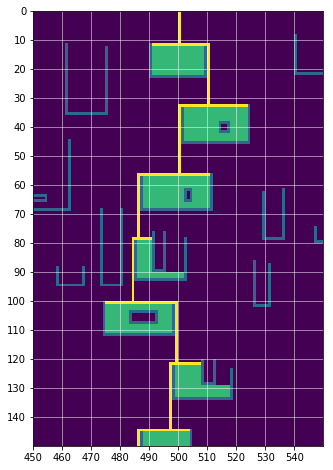

In [276]:
array_old = np.copy(arrayin)

for loop in range(10000):
    array_new = np.copy(array_old)
    for coords in np.argwhere(array_old == 3):
        if array_old[coords[0],coords[1]] == 3: #falling water
            try:
                if array_old[coords[0],coords[1]+1] == 0: #air
                    array_new[coords[0],coords[1]+1] = 3 #set to falling water
            except IndexError:
                pass
            try:
                if array_old[coords[0],coords[1]+1] in [1,2]: #if falling onto clay or still water    
                    if array_new[coords[0]-1,coords[1]] == 0: # as long as adjacent cell is air
                        array_new[coords[0]-1,coords[1]] = 3 # set adjacent to falling/still water
                    if array_new[coords[0]+1,coords[1]] == 0:
                        array_new[coords[0]+1,coords[1]] = 3
            except IndexError:
                pass
            try:
                if array_new[coords[0]-1,coords[1]] in [1,2] and array_old[coords[0],coords[1]+1] in [1,2]:
                    if test_still(array_old,[coords[0],coords[1]]):
                        array_new[coords[0],coords[1]] = 2
            except IndexError:
                pass
    array_old = np.copy(array_new)
    

im = plt.figure(figsize=(8,8))
ax = plt.gca()
plt.imshow(array_new[figminx:figmaxx,figminy:figmaxy].T,extent=[figminx,figmaxx,figmaxy,figminy])
ax.set_xticks(np.arange(figminx, figmaxx, 10))
ax.set_yticks(np.arange(figminy, figmaxy, 10))
ax.set_xticklabels(np.arange(figminx, figmaxx, 10))
ax.set_yticklabels(np.arange(figminy, figmaxy, 10))
ax.grid(color='w', linestyle='-', linewidth=0.5)
  

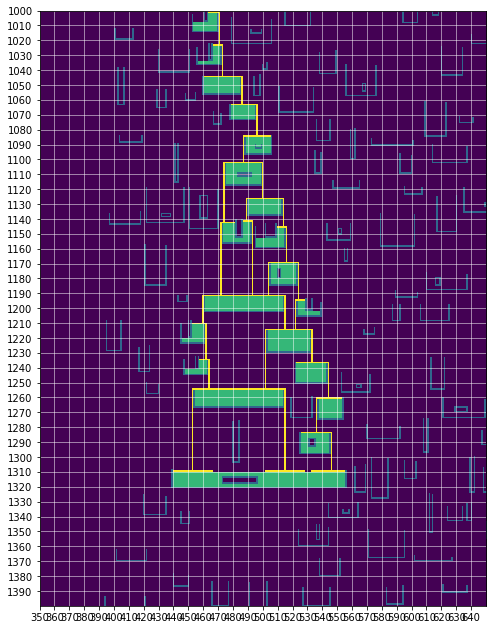

In [284]:
#after 10000 iterations

figminx = 350
figmaxx = 650
figminy = 1000
figmaxy = 1400

im = plt.figure(figsize=(8,12))
ax = plt.gca()
plt.imshow(array_new[figminx:figmaxx,figminy:figmaxy].T,extent=[figminx,figmaxx,figmaxy,figminy])
ax.set_xticks(np.arange(figminx, figmaxx, 10))
ax.set_yticks(np.arange(figminy, figmaxy, 10))
ax.set_xticklabels(np.arange(figminx, figmaxx, 10))
ax.set_yticklabels(np.arange(figminy, figmaxy, 10))
ax.grid(color='w', linestyle='-', linewidth=0.5)

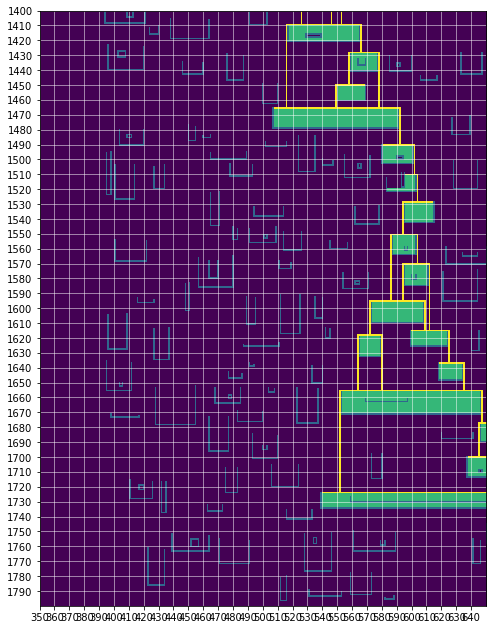

In [285]:
#after 10000 more iterations

for loop in range(10000):
    array_new = np.copy(array_old)
    for coords in np.argwhere(array_old == 3):
        if array_old[coords[0],coords[1]] == 3: #falling water
            try:
                if array_old[coords[0],coords[1]+1] == 0: #air
                    array_new[coords[0],coords[1]+1] = 3 #set to falling water
            except IndexError:
                pass
            try:
                if array_old[coords[0],coords[1]+1] in [1,2]: #if falling onto clay or still water    
                    if array_new[coords[0]-1,coords[1]] == 0: # as long as adjacent cell is air
                        array_new[coords[0]-1,coords[1]] = 3 # set adjacent to falling/still water
                    if array_new[coords[0]+1,coords[1]] == 0:
                        array_new[coords[0]+1,coords[1]] = 3
            except IndexError:
                pass
            try:
                if array_new[coords[0]-1,coords[1]] in [1,2] and array_old[coords[0],coords[1]+1] in [1,2]:
                    if test_still(array_old,[coords[0],coords[1]]):
                        array_new[coords[0],coords[1]] = 2
            except IndexError:
                pass
    array_old = np.copy(array_new)
    
figminx = 350
figmaxx = 650
figminy = 1400
figmaxy = 1800

im = plt.figure(figsize=(8,12))
ax = plt.gca()
plt.imshow(array_new[figminx:figmaxx,figminy:figmaxy].T,extent=[figminx,figmaxx,figmaxy,figminy])
ax.set_xticks(np.arange(figminx, figmaxx, 10))
ax.set_yticks(np.arange(figminy, figmaxy, 10))
ax.set_xticklabels(np.arange(figminx, figmaxx, 10))
ax.set_yticklabels(np.arange(figminy, figmaxy, 10))
ax.grid(color='w', linestyle='-', linewidth=0.5)

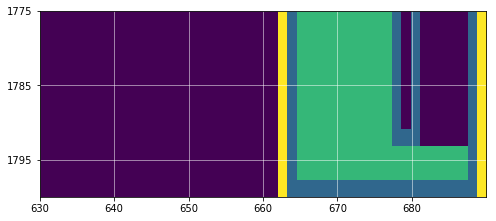

In [290]:
    
figminx = 630
figmaxx = 690
figminy = 1775
figmaxy = 1800

im = plt.figure(figsize=(8,12))
ax = plt.gca()
plt.imshow(array_new[figminx:figmaxx,figminy:figmaxy].T,extent=[figminx,figmaxx,figmaxy,figminy])
ax.set_xticks(np.arange(figminx, figmaxx, 10))
ax.set_yticks(np.arange(figminy, figmaxy, 10))
ax.set_xticklabels(np.arange(figminx, figmaxx, 10))
ax.set_yticklabels(np.arange(figminy, figmaxy, 10))
ax.grid(color='w', linestyle='-', linewidth=0.5)

In [300]:
#Done the simulation

#now:
len(np.argwhere(array_new[:,minshelf:] == 2)) + len(np.argwhere(array_new[:,minshelf:] == 3))


33242

In [301]:
len(np.argwhere(array_new[:,minshelf:] == 2))

27256